# Lab 1 - Moddeling, Model analyses & Simulation

In this lab we will create an model of the inverted pendulum problem.  
You will do the following things individualy, you are allowed to discuss.

* Create a basic model of a regular pendulum
* Create a phase portraid of the pendulum's behaviour using numerical methods
* Changing the carataristics of the model manualy to match with the real-word model
* Add the remaining actuation to the model
* Create a function to infuence the amount of actuation (from discreet to continuem)
* Expiriment to see if you can bring the pendulum in the uprigt position  

In the next lab we will control the pendulum by top down reasoning, meaning given that the position of the pendulum is x how should we control the motor.  
Also you will need to think about stagegies to recenter the pendulum pivot point and measure the angle of the pendulum.

In [1]:
#you will need math, numpy and matplotlib for this lab
import math
import numpy as np
import matplotlib.pyplot as plt

Watch: https://www.youtube.com/watch?v=p_di4Zn4wz4  
There will be parts of the video that you could use as a guidance in this lab.  
Also read chapter 6.7 in the book nonlinear dynamics and chaos on BB.  
Additional info on State space > https://www.youtube.com/watch?v=hpeKrMG-WP0 

**Question [5 points]:** write down the equation of angular acceleration of the pendulum

In [2]:
# 3 constants will be given, that of gravity, length of the pendulum and air resitance (mu), try to estimate L and mu
g = 9.8
L = 1
mu = 0.3

In [3]:
# return 
def get_theta_double_dot(theta, theta_dot):
    return -mu*theta_dot - g/L*math.sin(theta)
    ''' return the angular acceleration of the pendulum theta is the angle, thata dot the angular velocity'''  

In [4]:
# Initial angle and speed
THETA_0 = np.pi/3
THETA_DOT_0 = 1

With the initial conditions known, the value of the angle can be calulated numerically.  

In [5]:
# Solving the angular behaviour of the pendulum numerically for an given input time t (in seconds).
# From now we will call this the simulation
def state(t):
    theta_list = []
    theta_dot_list = []
    theta = THETA_0
    theta_dot = THETA_DOT_0
    delta_t = 0.01
    for time in np.arange(0,t,delta_t):
        theta_double_dot = get_theta_double_dot(theta, theta_dot)
        theta_dot += theta_double_dot * delta_t
        theta += theta_dot * delta_t
        
        theta_list.append(theta)
        theta_dot_list.append(theta_dot)
        
    return theta, theta_dot, theta_list, theta_dot_list

In [6]:
THETA_0 = np.pi
THETA_DOT_0 = 0.
state(0.01)

(3.141592653589793,
 -1.2001538631644061e-17,
 [3.141592653589793],
 [-1.2001538631644061e-17])

In [7]:
# try some different values of t, theta_0 and theta_dot_0 and explain what happens
t_1 = 0.1
t_2 = 2
t_3 = 3
THETA_0 = np.pi / 4
THETA_DOT_0 = 2

s_1 = state(t_1)
s_2 = state(t_2)
s_3 = state(t_3)
print(THETA_0)
print(s_1[:2])
print(s_2[:2])
print(s_3[:2])

0.7853981633974483
(0.9424332236354912, 1.2069319133828884)
(0.3521666070991959, 2.0686059362862412)
(-0.23115582725424152, -1.892887273469975)


Now you can create an array of possible initial states THETA_0 and THETA_DOT_0  
and calculate the derivative with def state(t) where t is equal to delta_t.   
Create this data and display it similar to the example below.  
**[5 points]:** Create the phase portrait from 0 to 4 Pi radius. 

6.909703535443718


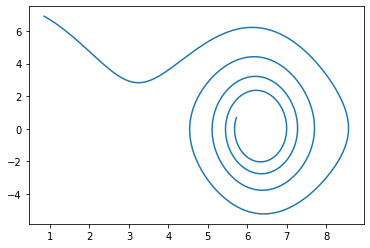

In [8]:
THETA_0 = np.pi / 4
THETA_DOT_0 = 7
_, _, theta_list, theta_dot_list = state(10)
print(theta_dot_list[0])
plt.plot(theta_list, theta_dot_list)

(63, 1)
(20, 1)
(20, 63)


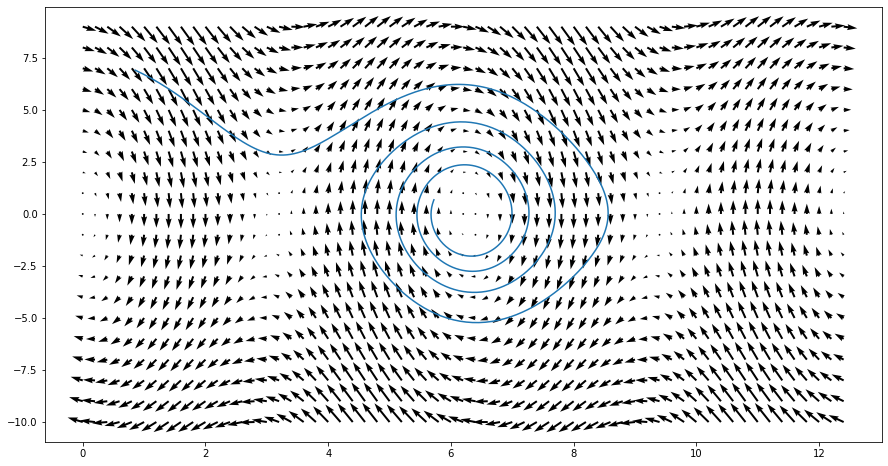

In [9]:
#And example of how to display the estimated direction of angular behaviour (phase portrait)

X = np.arange(0, 4*math.pi, 0.2).reshape(-1, 1) # theta (63, 1)
Y = np.arange(-10, 10, 1).reshape(-1, 1) # theta_dot  (20, 1)
v_list = []
 
for y in Y:
    for x in X:
        v = get_theta_double_dot(x, y)
        v_list.append(v)
# V is theta_double_dot
V = np.asarray(v_list).reshape(Y.shape[0], X.shape[0])

# U is theta_dot
# first make U an empty array
U = np.zeros((Y.shape[0], X.shape[0]))
# itrate through every element of U, fill the value of it
for i in range(U.shape[0]):
    for j in range(U.shape[1]):
        U[i][j] = Y[i] # ith row of U has same value, which is Y[i](theta dot[i])

print(X.shape)        
print(Y.shape)        
print(U.shape)        

fig, ax = plt.subplots(figsize = (15,8))
q = ax.quiver(X, Y, U, V)
ax.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Quiver key, length = 10', labelpos='E')
plt.plot(theta_list, theta_dot_list)
plt.show()


When we add the motor, we are actualy applieng an additional force on the pendulum. Think of what would happen when the motor stops and the pendulum is in an horizontal possition, how is this stopping (negative acceleration) translated to the pendulum? Now think of what would happen if the pendulum is in a vertcal position. For now we only consider the effect on the pendulum (and not the motor). 

**Question [5 points]:** write down the equation of angular acceleration of the pendulum with acceleration of the motor included.

In [10]:
# you will get an aditional value that infuences theta_double_dot
g = 9.8
L = 1
mu = 0.3
a = 3 

In [11]:
# add the new accelration parameter
def get_theta_double_dot_with_a(theta, theta_dot, a_motor):
    return -mu*theta_dot - g/L*math.sin(theta) - a_motor * math.cos(theta)
''' return the angular acceleration of the pendulum. '''  

' return the angular acceleration of the pendulum. '

Now that we have a new equation for the angular acceleration,  
we should model the expected response of the motor when it is turned on.  
In the prototype direction of motion, speed and duration are input to drive the motor.  
for now we can assume that that only the motor speed is of infuence on the acceleration.

In [12]:
'''
a basic idea of what the acceleration of the motor could look like is shown below.
feel free to come up with a more realistic version,   
in the next lab we will expiriment to see what the actual acceleration functions look like
with inversing the direction, these functions will be flipped. 
''' 

'\na basic idea of what the acceleration of the motor could look like is shown below.\nfeel free to come up with a more realistic version,   \nin the next lab we will expiriment to see what the actual acceleration functions look like\nwith inversing the direction, these functions will be flipped. \n'

In [13]:
%%html
<?xml version="1.0" encoding="utf-8"?>
<!-- Generator: Adobe Illustrator 16.0.0, SVG Export Plug-In . SVG Version: 6.00 Build 0)  -->
<!DOCTYPE svg PUBLIC "-//W3C//DTD SVG 1.1//EN" "http://www.w3.org/Graphics/SVG/1.1/DTD/svg11.dtd">
<svg version="1.1" id="Layer_1" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/1999/xlink" x="0px" y="0px"
	 width="686.127px" height="556.591px" viewBox="0 0 686.127 556.591" enable-background="new 0 0 686.127 556.591"
	 xml:space="preserve">
<path fill="#FFFFFF" stroke="#000000" stroke-miterlimit="10" d="M52.001,112.578h22.535c0,0,3.521-59.859,64.084-59.859
	c57.042,0,62.676,59.859,62.676,59.859h159.858c0,0-0.704,72.387,68.311,71.683c56.335-0.575,56.338-75.908,56.338-75.908"/>
<path fill="#FFFFFF" stroke="#000000" stroke-miterlimit="10" d="M52.367,259.761h22.535c0,0,0.027-102.817,60.591-102.817
	c57.042,0,66.17,102.817,66.17,102.817h159.858c0,0,0.728,107.743,69.746,107.746c59.536,0.003,54.902-111.971,54.902-111.971"/>
<path fill="#FFFFFF" stroke="#000000" stroke-miterlimit="10" d="M52.409,427.366h22.535c0,0,3.521-59.859,64.084-59.859
	c57.042,0,62.676,59.859,62.676,59.859h320.858c0,0-2.704,72.387,66.311,71.682c56.335-0.574,56.339-75.906,56.339-75.906"/>
<line fill="none" stroke="#000000" stroke-miterlimit="10" x1="52.001" y1="23.845" x2="52.001" y2="518.916"/>
<rect x="18.521" y="530.183" fill="none" width="124.648" height="52.816"/>
<text transform="matrix(1 0 0 1 18.5215 538.7744)" font-family="'ArialMT'" font-size="12">Start of motor</text>
<rect x="302.07" y="394.225" fill="none" width="124.648" height="52.816"/>
<text transform="matrix(1 0 0 1 311.3618 402.8164)"><tspan x="0" y="0" font-family="'ArialMT'" font-size="12">Increase duration of </tspan><tspan x="24.357" y="14.4" font-family="'ArialMT'" font-size="12">active time</tspan></text>
<rect x="219.337" y="235.817" fill="none" width="124.648" height="52.816"/>
<text transform="matrix(1 0 0 1 240.6353 244.4087)" font-family="'ArialMT'" font-size="12">Increase speed</text>
<rect x="219.338" y="58.208" fill="none" width="124.649" height="52.816"/>
<text transform="matrix(1 0 0 1 222.6274 66.7998)"><tspan x="0" y="0" font-family="'ArialMT'" font-size="12">Expected acceleration </tspan><tspan x="10.345" y="14.4" font-family="'ArialMT'" font-size="12">as function of time</tspan></text>
</svg>


**[5 points]:** Now create a class that creates these functions with inputs: direction, speed and duration (in simulation steps)

In [14]:
class Motor_Acc: # direction, speed, duration
    def __init__(self, direction, speed, duration):
        self.direction = direction
        self.speed = speed
        self.topSpeed = 20 # top speed is 20m/s
        self.topAcc = 50 # top acc is 50m/s^2
        self.duration = duration
        self.max_duration = 4
        self.time = 0
        self.func = self.create_func()
    
    def create_func(self):
        func_list = []

        # create a list of acc, which is a sine wave
        if self.direction == 1: # right
            for time_step in range(1, self.duration+1):
                acc = np.sin(2*np.pi/self.duration * time_step) * self.speed
                if acc > self.topAcc:
                    acc = self.topAcc
                func_list.append(acc) 

            
        
        elif self.direction == -1: # left
            for time_step in range(1, self.duration+1):
                acc = -1 * np.sin(2*np.pi/self.duration * time_step) * self.speed
                if acc < (-1 * self.topAcc):
                    acc = self.topAcc
                func_list.append(acc)
            
        
        ''' Create a list of acceleration values so that every step correspons to a step in simulation.
        Use the direction, speed and duration to create this list.
        In a next Lab we will use the data of the prototype to fit a function. 
        If you want to create a function now, that is fine.
        '''
        return func_list #or some function
        
    def tik(self):
        '''
        return the acceleration at a given time and shift the time
        '''
        self.time = self.time + 1
        if self.time < self.duration:
            return self.func[self.time]
        else:
            return 0. #return an acceleration of 0
    
    def set_motor(self, direction, speed, duration):
        self.direction = direction
        self.speed = speed
        self.duration = duration
        self.time = 0
        self.func = self.create_func()

In [15]:
# Now we can add the motor in the simulation
direction = 1
speed = 10
duration = 6

# Initial conditions of pendulum
THETA_0 = 0
THETA_DOT_0 = 0

motor = Motor_Acc(direction, speed, duration)

In [16]:
# Solving the angular behaviour of the pendulum numerically for an given input time t (in seconds)
def state_with_motor(t):
    
    theta = THETA_0
    theta_dot = THETA_DOT_0
    delta_t = 0.01
    theta_sum = []
    theta_dot_sum = []
    for time in np.arange(0,t,delta_t):
        '''
        Now the motor is running from the strat of the simulation. 
        Eventually we want to strat the motor according to how we want to control it (next lab). 
        Now create 2 list to keep track of theta and theta_dot to visualize the progress.
        '''
        #Create lists
        
        a_of_motor = motor.tik()
        
        theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, a_of_motor)
        theta += theta_dot * delta_t
        theta_dot += theta_double_dot * delta_t
        # append theta and theta_dot to lists
        theta_sum.append(theta)
        theta_dot_sum.append(theta_dot)
    #return the lists
    return theta_sum, theta_dot_sum

In [17]:
t = 3
theta_sum, theta_dot_sum = state_with_motor(t)

**[5 points]:** Create different motor controls and different initial conditions. 
Plot what happens and point out the first motor settings that will increase the angle the most. 

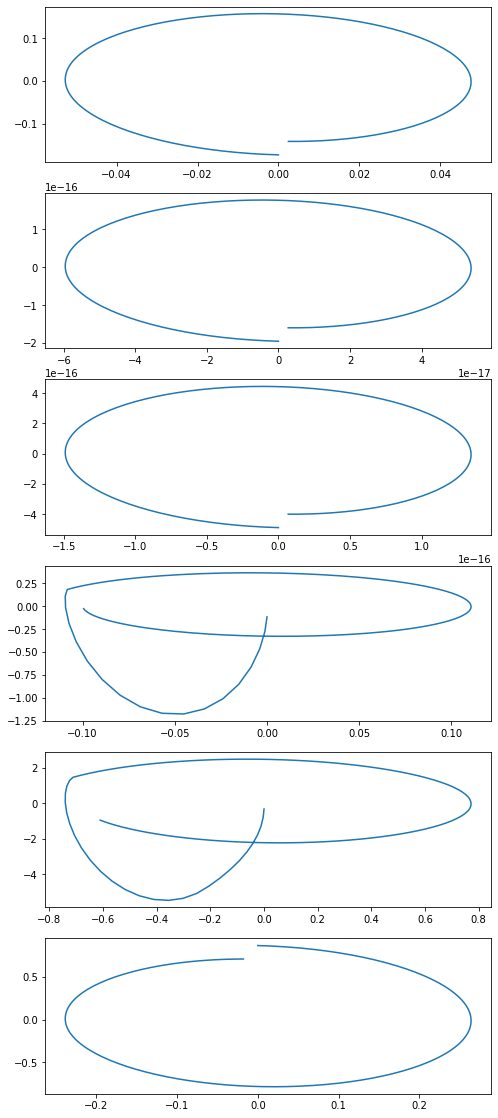

In [18]:
THETA_0 = 0
THETA_DOT_0 = 0
x = 6
fig, axs = plt.subplots(x, figsize=(8,20))

t = 2
directions = [-1, -1, -1, 1, 1, 1]
speeds = [20, 80, 200, 20, 80, 100]
durations = [3, 2, 2, 20, 30, 3]

# Initial conditions of pendulum # did not use them...
# THETA_0s = [np.pi*0.3, np.pi*0.3, np.pi*0.3, np.pi*0.3]
# THETA_DOT_0s = [0, 0, 0]

for n in range(x):
    motor = Motor_Acc(directions[n], speeds[n], durations[n])
    theta_sum, theta_dot_sum = state_with_motor(t)
    axs[n].plot(theta_sum, theta_dot_sum)


**Bonus Question:** Create a 3d phase portait of the pendumum in terms of theta, theta_dot and motor acceleration. Use one acceleration function as sequential input in z (so the arrows will all point in one direction in the z-axis). This shows a time series evolution of the system for initial conditions theta and theta_dot given an motor function. Can you find areas where acceleration is of low effect and high effect?

<IPython.core.display.Javascript object>


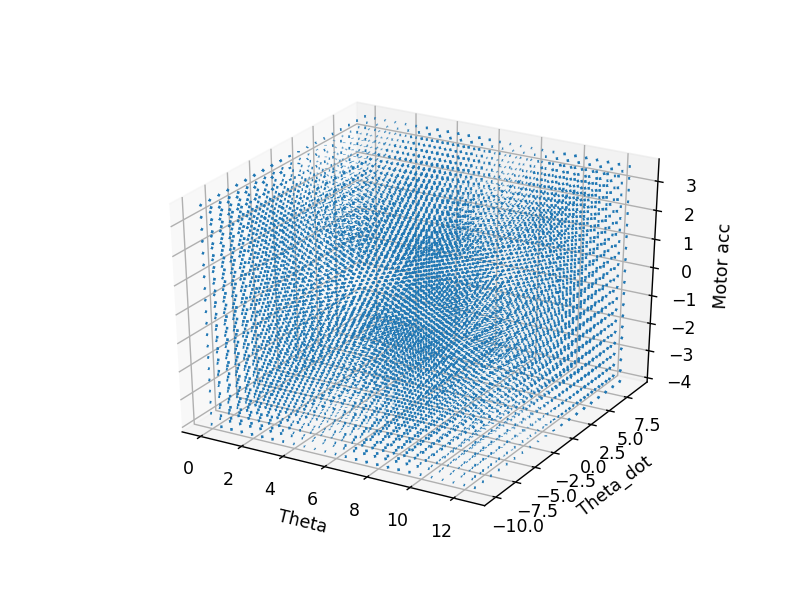

In [20]:
%matplotlib notebook
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make the grid
x, y, z = np.meshgrid(np.arange(0, 4*math.pi, 0.5),
                      np.arange(-10, 10, 1),
                      np.arange(-4, 4, 0.4))

u = np.zeros(x.shape)
v = np.zeros(x.shape)
w = np.zeros(x.shape)

theta_dot_list = []
theta_double_dot_list = []
motor_acc_list = []
delta_t = 0.01

for i in range(np.arange(0, 4*math.pi, 0.5).shape[0]):
    for j in range(np.arange(-10, 10, 1).shape[0]):
        for k in range(np.arange(-2, 2, 0.2).shape[0]):
            # calculating the theta_double_dot with function(with motor involved)
            theta = np.arange(0, 4*math.pi, 0.5)[i]
            theta_dot = np.arange(-10, 10, 1)[j]
            motor_acc = np.arange(-2, 2, 0.2)[k]
            
            theta_double_dot = get_theta_double_dot_with_a(theta, theta_dot, motor_acc)
            theta += theta_dot * delta_t
            theta_dot += theta_double_dot * delta_t
            
            u[j][i][k] = theta_dot # theta_dot
            v[j][i][k] = theta_double_dot # theta_double_dot
            w[j][i][k] = motor_acc

ax.set_xlabel('Theta')
ax.set_ylabel('Theta_dot')
ax.set_zlabel('Motor acc')

ax.quiver(x, y, z, u, v, w, length=0.1, normalize=True)

plt.show()

This is probably not the right plot, what I intended to do is to make a 3D phase portait that when you look alone the z axis it is the same as the 2D phase portait, and the direction in Z axis is the value of motor accaletation.